<a href="https://colab.research.google.com/github/PeanutButtermitKase/ReinforcementLearningModels/blob/main/RL_pole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install gym and necessary packages
!pip install gym matplotlib
!pip install numpy==1.23.5 --quiet
import os
os.kill(os.getpid(), 9)  # Automatically restarts the Colab runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 r

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import trange  # Optional: for progress bar

In [2]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
env._max_episode_steps = 10000  # simulate for more steps
env.env.length = 0.25  # shorter pole

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:


# Discretize the continuous observation space
def discretize(obs, bins):
    # Define the upper and lower bounds for each observation dimension
    upper_bounds = np.array([4.8, 5, 0.418, 5])
    lower_bounds = np.array([-4.8, -5, -0.418, -5])

    # Normalize observation into [0, 1]
    ratios = (obs - lower_bounds) / (upper_bounds - lower_bounds)

    # Scale to the number of bins and round to nearest integer
    discrete_obs = np.round((np.array(bins) - 1) * ratios).astype(int)

    # Ensure indices are within valid range
    discrete_obs = np.clip(discrete_obs, 0, np.array(bins) - 1)

    return tuple(discrete_obs)

# Q-learning training function
def train_q_learning(env, bins, num_episodes=1000, learning_rate=0.1,
                     discount_factor=0.95, epsilon=1.0, epsilon_decay=0.995,
                     epsilon_min=0.01):

    # Initialize the Q-table with zeros
    q_table = np.zeros(bins + [env.action_space.n])

    # Store total rewards per episode
    rewards_per_episode = []

    # Loop through each episode
    for episode in trange(num_episodes):
        # Reset the environment and get initial observation
        obs = env.reset()
        discrete_state = discretize(obs, bins)
        done = False
        total_reward = 0

        # Loop until the episode ends
        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_table[discrete_state])  # Exploit

            # Take action in the environment
            next_obs, reward, terminated, truncated = env.step(action)
            next_discrete_state = discretize(next_obs, bins)
            done = terminated or truncated  # Episode end condition

            # Q-value update rule
            best_future_q = np.max(q_table[next_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            q_table[discrete_state + (action,)] += learning_rate * (
                reward + discount_factor * best_future_q - current_q
            )

            # Move to next state
            discrete_state = next_discrete_state
            total_reward += reward

        # Decay exploration rate
        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        rewards_per_episode.append(total_reward)

        # Print status every 50 episodes
        if (episode + 1) % 50 == 0:
            avg_reward = np.mean(rewards_per_episode[-50:])
            print(f"Episode {episode + 1}: Avg Reward (last 50): {avg_reward:.2f}, Epsilon: {epsilon:.3f}")

    print("Training finished.")
    return q_table, rewards_per_episode

# Set up environment and random seed for reproducibility
env = gym.make("CartPole-v1")
np.random.seed(42)
env.reset(seed=42)

# Define discretization bins per observation variable
bins = [6, 12, 6, 12]

# Train the agent
q_table, rewards = train_q_learning(env, bins, num_episodes=1000)




 10%|█         | 100/1000 [00:00<00:01, 505.45it/s]

Episode 50: Avg Reward (last 50): 24.40, Epsilon: 0.778
Episode 100: Avg Reward (last 50): 19.50, Epsilon: 0.606


 20%|█▉        | 195/1000 [00:00<00:02, 357.24it/s]

Episode 150: Avg Reward (last 50): 22.88, Epsilon: 0.471
Episode 200: Avg Reward (last 50): 40.60, Epsilon: 0.367


 26%|██▋       | 264/1000 [00:00<00:02, 246.58it/s]

Episode 250: Avg Reward (last 50): 48.88, Epsilon: 0.286


 32%|███▏      | 315/1000 [00:01<00:04, 138.69it/s]

Episode 300: Avg Reward (last 50): 63.56, Epsilon: 0.222


 36%|███▋      | 365/1000 [00:01<00:05, 111.85it/s]

Episode 350: Avg Reward (last 50): 101.64, Epsilon: 0.173


 41%|████▏     | 413/1000 [00:02<00:05, 100.54it/s]

Episode 400: Avg Reward (last 50): 106.62, Epsilon: 0.135


 45%|████▌     | 450/1000 [00:02<00:04, 111.82it/s]

Episode 450: Avg Reward (last 50): 83.78, Epsilon: 0.105


 52%|█████▏    | 516/1000 [00:03<00:06, 75.31it/s]

Episode 500: Avg Reward (last 50): 129.22, Epsilon: 0.082


 57%|█████▋    | 569/1000 [00:04<00:04, 105.93it/s]

Episode 550: Avg Reward (last 50): 94.58, Epsilon: 0.063


 61%|██████    | 610/1000 [00:04<00:05, 74.85it/s]

Episode 600: Avg Reward (last 50): 94.18, Epsilon: 0.049


 67%|██████▋   | 667/1000 [00:05<00:03, 91.37it/s]

Episode 650: Avg Reward (last 50): 102.40, Epsilon: 0.038


 71%|███████   | 708/1000 [00:05<00:03, 86.23it/s]

Episode 700: Avg Reward (last 50): 116.94, Epsilon: 0.030


 76%|███████▌  | 759/1000 [00:06<00:03, 67.34it/s]

Episode 750: Avg Reward (last 50): 130.12, Epsilon: 0.023


 81%|████████  | 807/1000 [00:07<00:02, 66.06it/s]

Episode 800: Avg Reward (last 50): 127.78, Epsilon: 0.018


 86%|████████▌ | 860/1000 [00:08<00:02, 58.06it/s]

Episode 850: Avg Reward (last 50): 148.22, Epsilon: 0.014


 91%|█████████ | 907/1000 [00:08<00:01, 66.18it/s]

Episode 900: Avg Reward (last 50): 137.04, Epsilon: 0.011


 96%|█████████▌| 955/1000 [00:09<00:00, 67.21it/s]

Episode 950: Avg Reward (last 50): 117.24, Epsilon: 0.010


100%|██████████| 1000/1000 [00:10<00:00, 94.62it/s]

Episode 1000: Avg Reward (last 50): 141.28, Epsilon: 0.010
Training finished.


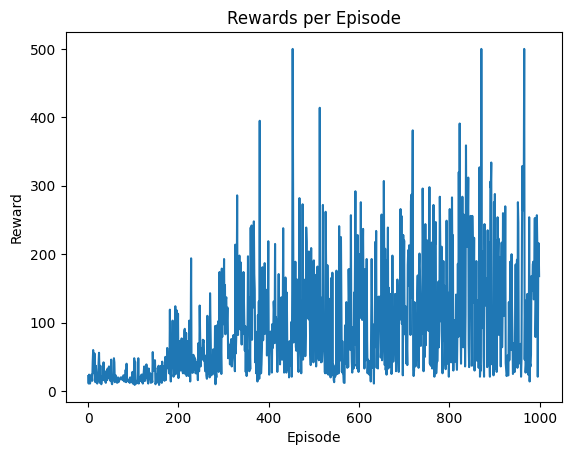

In [6]:
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards per Episode')
plt.show()


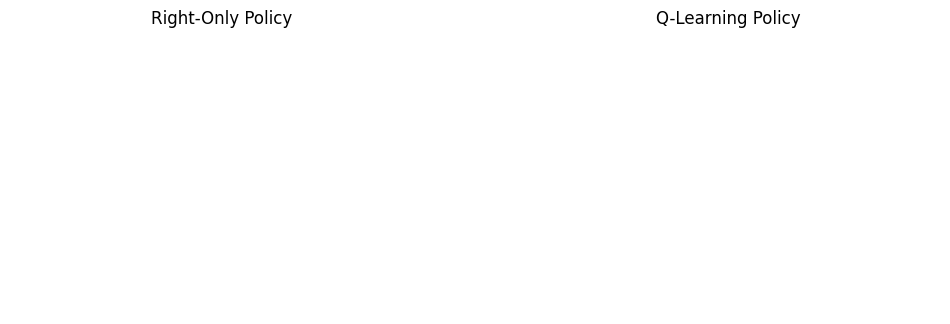

In [8]:
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import gymnasium as gym  # use gymnasium for compatibility
rc('animation', html='jshtml')
import random

# Create environment
env = gym.make("CartPole-v1", render_mode="rgb_array")  # required for rendering
obs, _ = env.reset()
env.env.length = 0.05  # shorter pole for more challenge

# Reuse your discretization function (assumed to be defined)
# def discretize(...)

# Function to capture frames from a policy episode
def capture_episode_frames(policy_fn, title):
    frames = []
    obs, _ = env.reset()
    discrete_state = discretize(obs, bins)
    done = False

    while not done:
        action = policy_fn(discrete_state)
        next_obs, reward, terminated, truncated, _ = env.step(action)

        frame = env.render()  # RGB array
        frames.append(frame)

        discrete_state = discretize(next_obs, bins)
        done = terminated or truncated

    return frames

# Policy 1: Random actions
def random_policy(_):
    return env.action_space.sample()

# Policy 2: Always go right (action=1)
def right_only_policy(_):
    return 1

# Policy 3: Use the trained Q-table
def trained_policy(discrete_state):
    return np.argmax(q_table[discrete_state])

# Capture both runs
frames_random = capture_episode_frames(right_only_policy, "Right-Only Policy")
frames_control = capture_episode_frames(trained_policy, "Trained Q-Learning Policy")

# Display animations side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("Right-Only Policy")
ax2.set_title("Q-Learning Policy")
ax1.axis('off')
ax2.axis('off')

ims = []
min_len = min(len(frames_random), len(frames_control))
for i in range(min_len):
    im1 = ax1.imshow(frames_random[i], animated=True)
    im2 = ax2.imshow(frames_control[i], animated=True)
    ims.append([im1, im2])

ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
display(ani)


